## http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
%matplotlib inline

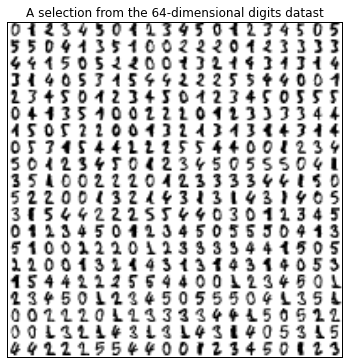

In [2]:
# subset of http://scikit-learn.org/stable/_downloads/plot_lle_digits.py
# see Kyle Kastner at https://youtu.be/r-1XJBHot58?t=1335

# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011
import matplotlib

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)  # make plot larger in notebook

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np

digits = load_digits(n_class=6)
X = digits.data
y = digits.target

n_img_per_row = 20
img = np.zeros((10 * n_img_per_row , 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix +8 , iy:iy+8] = X[ i * n_img_per_row +j ].reshape((8,8))

plt.imshow(img,cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits datast')

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
plt.show()


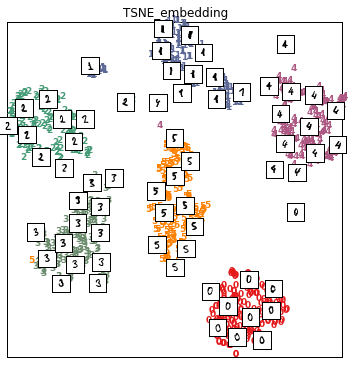

In [3]:
X_tsne = TSNE(n_components=2, init="pca", random_state=1999).fit_transform(X)
plot_embedding(X_tsne, title="TSNE_embedding")

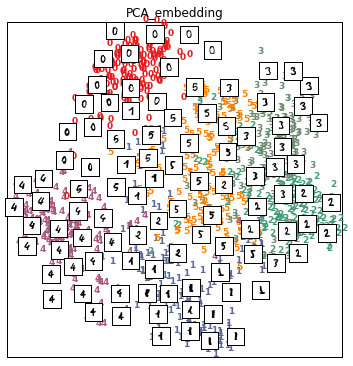

In [4]:
X_pca = PCA(n_components=2).fit_transform(X)
plot_embedding(X_pca, title="PCA_embedding")